# Project: Data Analysis project for US Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#gathering">Data Gathering</a></li>
        <li><a href="#cleaning">Data Inspection and Cleaning</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We have two datasets at hand:
<ol>
    <li>A dataset from National Instant Criminal Background Check System (NICS) that contains data about gun 
    <li>Census data about each state of the US.
</ol>


**The first dataset** contains columns that represent the type of transaction submitted to NICS. In addition, each type of transaction is broken down by the type of firearm:

<ul>
<li>Handgun—(a) any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.
<li>Long Gun—a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore either
a number of ball shot or a single projectile for each single pull of the trigger.
<li>Other—refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.
</ul>

**The second dataset** contains census data about each state from the 2010 US census and 2016 US estimations; It contains different data about the population size, household size, employment and firms.

### Research questions:
<ol>
    <li> Which state has the most gun purchases and what gun types are people more interested in?
    <li> What is the general trend of gun purchases?
    <li> Which state has the highest average growth rate in gun purchases (CAGR) (Compound average growth rate)?
    <li> Which census data factors affect the gun purchases?

### Library imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Custom functions

In [2]:
#function to convert dtypes
def dtype_convert(x):
    if x.name == 'FIPS Code':
        x = x.astype('string')
    elif x.str.contains('\.').any():
        x = x.astype('float')
    else:
        x = x.astype('string').astype('Int64')
    return x

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.
<a id='gathering'></a>
### Gathering Data

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#define file paths
FBI_path = 'Data/gun_data.xlsx'
census_path = 'Data/U.S. Census Data.csv'

#load data into dataframes as strings as read_excel was importing as float due to empty cells
#(default int type doesn't support NaN)
FBI = pd.read_excel(FBI_path, dtype='string')
census = pd.read_csv(census_path, dtype='string')

#create copy before transformation and cleansing
FBI_clean = FBI.copy()
census_clean = census.copy()

<a id='cleaning'></a>
### Data Inspection and cleaning

<b>Inspect the Gun data first </b>  
<li>Inspect the first few lines

In [4]:
FBI.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,0,0,9,16,3,0,0,3,32019
1,2017-09,Alaska,209,2,2320,2930,219,160,0,5,...,0,0,0,17,24,1,0,0,0,6303
2,2017-09,Arizona,5069,382,11063,7946,920,631,0,13,...,0,0,0,38,12,2,0,0,0,28394
3,2017-09,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,0,0,13,23,0,0,2,1,17747
4,2017-09,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,0,0,123506


<li>Inspect the last lines

In [5]:
FBI.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0,<NA>,14,2,<NA>,8,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,24
12481,1998-11,Washington,1,<NA>,65,286,<NA>,8,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,361
12482,1998-11,West Virginia,3,<NA>,149,251,<NA>,5,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,408
12483,1998-11,Wisconsin,0,<NA>,25,214,<NA>,2,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,241
12484,1998-11,Wyoming,8,<NA>,45,49,<NA>,5,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,107


<li>Check summary of data columns

In [6]:
FBI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   month                      12485 non-null  string
 1   state                      12485 non-null  string
 2   permit                     12461 non-null  string
 3   permit_recheck             1100 non-null   string
 4   handgun                    12465 non-null  string
 5   long_gun                   12466 non-null  string
 6   other                      5500 non-null   string
 7   multiple                   12485 non-null  string
 8   admin                      12462 non-null  string
 9   prepawn_handgun            10542 non-null  string
 10  prepawn_long_gun           10540 non-null  string
 11  prepawn_other              5115 non-null   string
 12  redemption_handgun         10545 non-null  string
 13  redemption_long_gun        10544 non-null  string
 14  redemp

The gun data appears to have lots of missing data but that mostly appears to be due to no gun sales during that particular month in that particular state.

Since the first columns contain date and state name we only inspect the remaining columns for correcting data types.

In [7]:
#check if any numerical columns contain decimals
FBI.iloc[:,2:].apply(lambda x:x.str.contains('\.')).any()

permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

We find that no columns contain decimals so we convert all data to the pandas Int64 type that supports NA values to avoid converting the columns with NaN to float.

In [8]:
#Convert numerical columns to pandas Int64 dtype
FBI_clean.iloc[:,2:] = FBI_clean.iloc[:,2:].apply(lambda x: x.astype(dtype = 'Int64'))

In [9]:
#create year and month column to datetime with yearly and monthly frequency
FBI_clean['Time Index'] = FBI_clean.month

In [10]:
FBI_clean['year'] = pd.to_datetime(FBI_clean['Time Index']).dt.to_period('Y')
FBI_clean['month'] = pd.to_datetime(FBI_clean['Time Index']).dt.to_period('M')
FBI_clean['quarter'] = pd.to_datetime(FBI_clean['Time Index']).dt.to_period('Q')

In [11]:
#index gun data by state
FBI_clean.set_index('state', inplace=True)

Index the data by state

In [12]:
#check if dtype changes are correct
FBI_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, Alabama to Wyoming
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype        
---  ------                     --------------  -----        
 0   month                      12485 non-null  period[M]    
 1   permit                     12461 non-null  Int64        
 2   permit_recheck             1100 non-null   Int64        
 3   handgun                    12465 non-null  Int64        
 4   long_gun                   12466 non-null  Int64        
 5   other                      5500 non-null   Int64        
 6   multiple                   12485 non-null  Int64        
 7   admin                      12462 non-null  Int64        
 8   prepawn_handgun            10542 non-null  Int64        
 9   prepawn_long_gun           10540 non-null  Int64        
 10  prepawn_other              5115 non-null   Int64        
 11  redemption_handgun         10545 non-null  Int64        
 12  redemption_long

<b>Inspect the Census Data</b>  
<li>Inspect the first few lines

In [13]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",<NA>,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",<NA>,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",<NA>,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",<NA>,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",<NA>,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [14]:
census.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
81,<NA>,Not available,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
82,S,Suppressed; does not meet publication standards,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
83,X,Not applicable,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
84,Z,Value greater than zero but less than half uni...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [15]:
census.tail(21)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
64,FIPS Code,<NA>,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
66,NOTE: FIPS Code values are enclosed in quotes ...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
67,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
68,Value Notes,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
69,1,Includes data not distributed by county.,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
70,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
71,Fact Notes,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
72,(a),Includes persons reporting only one race,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
73,(b),"Hispanics may be of any race, so also are incl...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


The bottom of the dataset contains lots of metadata that we will separate in another dataframe

In [16]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     string
 1   Fact Note       28 non-null     string
 2   Alabama         65 non-null     string
 3   Alaska          65 non-null     string
 4   Arizona         65 non-null     string
 5   Arkansas        65 non-null     string
 6   California      65 non-null     string
 7   Colorado        65 non-null     string
 8   Connecticut     65 non-null     string
 9   Delaware        65 non-null     string
 10  Florida         65 non-null     string
 11  Georgia         65 non-null     string
 12  Hawaii          65 non-null     string
 13  Idaho           65 non-null     string
 14  Illinois        65 non-null     string
 15  Indiana         65 non-null     string
 16  Iowa            65 non-null     string
 17  Kansas          65 non-null     string
 18  Kentucky    

In [17]:
#separate column notes (Fact notes and the differenc footnotes at the end)
column_notes = census_clean.iloc[:,:2].loc[census['Fact Note'].notna()].reset_index(drop=True)

In [18]:
#Drop the metadata info and column from main dataset
census_clean = census.copy().iloc[:-20].drop(columns='Fact Note', inplace=False)

In [19]:
census_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     string
 1   Alabama         65 non-null     string
 2   Alaska          65 non-null     string
 3   Arizona         65 non-null     string
 4   Arkansas        65 non-null     string
 5   California      65 non-null     string
 6   Colorado        65 non-null     string
 7   Connecticut     65 non-null     string
 8   Delaware        65 non-null     string
 9   Florida         65 non-null     string
 10  Georgia         65 non-null     string
 11  Hawaii          65 non-null     string
 12  Idaho           65 non-null     string
 13  Illinois        65 non-null     string
 14  Indiana         65 non-null     string
 15  Iowa            65 non-null     string
 16  Kansas          65 non-null     string
 17  Kentucky        65 non-null     string
 18  Louisiana   

In [20]:
census_clean.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


The dataset has the factors as rows instead of columns so we transpose the dataset to show factors as columns

In [21]:
#transpose data to make variables as columns
census_clean = census_clean.T
census_clean.columns = census_clean.iloc[0]
census_clean.drop(index='Fact', inplace=True)

In [22]:
census_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     string
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     string
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     string
 3   Population, Census, April 1, 2010                                                       50 non-null     string
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     string
 5   Persons under 5 years, percent, April 1, 2010                             

The columns have very long names.  
To rename the columns I created a column name map in an external spreadsheet and used it to rename

In [23]:
#pd.Series(census_clean.columns).to_excel(r'columns.xls', index=False)

In [24]:
#Read the column map after being created on the spreadsheet application
column_map = pd.read_excel('column_map.xls')

In [25]:
column_map = dict(zip(column_map.iloc[:,0],column_map.iloc[:,1]))

In [26]:
census_clean.rename(columns=dict(column_map), inplace=True)

In [27]:
census_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   pop_e_2016                              50 non-null     string
 1   pop_e_2010                              50 non-null     string
 2   pop_change                              50 non-null     string
 3   pop_c_2010                              50 non-null     string
 4   u5_2016                                 50 non-null     string
 5   u5_2010                                 50 non-null     string
 6   u18_2016                                50 non-null     string
 7   u18_2010                                50 non-null     string
 8   o65_2016                                50 non-null     string
 9   o65_2010                                50 non-null     string
 10  fem_2016                                50 non-null     string
 11  fe

By quick inspection of the census data on a spreadsheet application we found some cells that contain:
<ol>
<li> Symbols that prevent the conversion of dtypes to numerical
<li> References to the footnotes

<b>1. Check cells that contain any of the bad symbols</b>

In [28]:
symbols_list = ['\,','\$','\%','\"']

In [29]:
#check how many cells contain any of those symbols
bad_count = census_clean.apply(lambda x: x.str.contains('|'.join(symbols_list))).sum().sum()
print(f'Count of cells having bad symbols is {bad_count}')

Count of cells having bad symbols is 2362


In [30]:
#remove quotes from FIPS Code
census_clean['FIPS_code'] = census_clean['FIPS_code'].apply(lambda x: x.replace('"',''))
#remove commas, percentage signs and dollar signs
census_clean = census_clean.applymap(lambda x: x.replace(',',''))
census_clean = census_clean.applymap(lambda x: x.replace('$',''))
census_clean = census_clean.applymap(lambda x: float(x.replace('%',''))/100 if ('%' in x) else x)

In [31]:
#check if any of those symbols still exist
bad_count = census_clean.apply(lambda x: x.str.contains('|'.join(symbols_list))).sum().sum()

if bad_count == 0:
    print('Bad symbols are removed from all cells')

Bad symbols are removed from all cells


<b>2. Check cells containing any of the footnotes</b>

In [32]:
#check number of cells containing any of the footnotes
f_count = census_clean.applymap(lambda x: x in column_notes.loc[column_notes['Fact'].notna(),'Fact'].values).sum().sum()
print(f'Footnote count is {f_count}')

#check count of NA
na_count = census_clean.isna().sum().sum()
print(f'NA count is {na_count}')

#replace those cells with NA
census_clean = census_clean.applymap(lambda x: np.nan if x in column_notes.loc[column_notes['Fact'].notna(),'Fact'].values else x)

#check if all are replaced with NA
na_count = census_clean.isna().sum().sum()
print(f'NA count after modification is {na_count}')

if na_count == f_count:
    print('All the cells containing the footnote references are converted to NA')

Footnote count is 7
NA count is 0
NA count after modification is 7
All the cells containing the footnote references are converted to NA


In [33]:
census_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   pop_e_2016                              50 non-null     object
 1   pop_e_2010                              50 non-null     object
 2   pop_change                              50 non-null     object
 3   pop_c_2010                              50 non-null     object
 4   u5_2016                                 50 non-null     object
 5   u5_2010                                 50 non-null     object
 6   u18_2016                                50 non-null     object
 7   u18_2010                                50 non-null     object
 8   o65_2016                                50 non-null     object
 9   o65_2010                                50 non-null     object
 10  fem_2016                                50 non-null     object
 11  fe

The next step is to convert the columns to appropriate dtypes after cleaning the bad symbols and footnote references

In [34]:
census_clean = census_clean.apply(dtype_convert)

In [35]:
#check dtypes
census_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   pop_e_2016                              50 non-null     Int64  
 1   pop_e_2010                              50 non-null     Int64  
 2   pop_change                              50 non-null     float64
 3   pop_c_2010                              50 non-null     Int64  
 4   u5_2016                                 50 non-null     float64
 5   u5_2010                                 50 non-null     float64
 6   u18_2016                                50 non-null     float64
 7   u18_2010                                50 non-null     float64
 8   o65_2016                                50 non-null     float64
 9   o65_2010                                50 non-null     float64
 10  fem_2016                                50 non-null     fl

<a id='eda'></a>
## Exploratory Data Analysis

In [36]:
#quick data exploration
FBI_clean.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [37]:
census_clean.describe()

Fact,pop_e_2016,pop_e_2010,pop_change,pop_c_2010,u5_2016,u5_2010,u18_2016,u18_2010,o65_2016,o65_2010,...,firms,men_firms,women_firms,minority_firms,nonminority_firms,veteran_firms,nonveteran_firms,pop_per_square,land,FIPS_code
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.00000,5.000000e+01,50.000000,50.000000,50.000000
mean,6.448927e+06,6.163127e+06,0.041800,6.162876e+06,0.061600,0.065460,0.22750,0.238820,0.156160,0.13292,...,5.548918e+05,2.976230e+05,1.971777e+05,1.585531e+05,3.806367e+05,50502.72000,4.817082e+05,194.962000,70636.887800,29.320000
std,7.271769e+06,6.848463e+06,0.033811,6.848235e+06,0.006612,0.007579,0.01977,0.019075,0.018321,0.01664,...,6.645229e+05,3.540115e+05,2.482425e+05,3.017390e+05,3.618627e+05,52073.87529,5.921109e+05,261.091465,85815.678218,15.782243
min,5.855010e+05,5.637670e+05,-0.012000,5.636260e+05,0.048000,0.051000,0.19000,0.207000,0.104000,0.07700,...,6.242700e+04,3.003900e+04,1.934400e+04,2.354000e+03,3.851000e+04,6470.00000,5.135300e+04,1.200000,1033.810000,1.000000
25%,1.850106e+06,1.833003e+06,0.016250,1.833004e+06,0.058000,0.062000,0.21650,0.226750,0.149250,0.12425,...,1.478222e+05,7.734775e+04,4.682475e+04,1.471450e+04,1.310602e+05,15796.50000,1.254088e+05,44.450000,36741.167500,17.250000
50%,4.559320e+06,4.436412e+06,0.040500,4.436370e+06,0.061000,0.065000,0.22750,0.237000,0.156500,0.13500,...,3.535155e+05,1.951455e+05,1.274355e+05,6.306350e+04,2.769725e+05,38051.50000,2.959635e+05,98.750000,53891.280000,29.500000
75%,7.198768e+06,6.680362e+06,0.063750,6.680312e+06,0.064000,0.069750,0.23675,0.248000,0.165000,0.14275,...,5.933612e+05,3.403212e+05,2.066418e+05,1.301590e+05,4.481730e+05,58253.25000,5.116312e+05,209.500000,81225.725000,41.750000
max,3.925002e+07,3.725452e+07,0.127000,3.725396e+07,0.083000,0.095000,0.30200,0.315000,0.199000,0.17300,...,3.548449e+06,1.852580e+06,1.320085e+06,1.619857e+06,1.819107e+06,252377.00000,3.176341e+06,1195.500000,570640.950000,56.000000


### Research questions:
<ol>
    <li> Which state has the most gun purchases and what gun types are people more interested in?
    <li> What is the general trend of gun purchases?
    <li> Which state has the highest average growth rate in gun purchases (CAGR) (Compound average growth rate)?
    <li> Which census data factors affect the gun purchases?

### 1. Which state has the most gun purchases and what gun types are people more interested in?

The top state that buys guns is Kentucky with a total of 29762434
The top state that buys handguns is Texas with a total of 7344061
The top state that buys long guns is Pennsylvania with a total of 9387302
The top state that buys other types of guns is California with a total of 343180


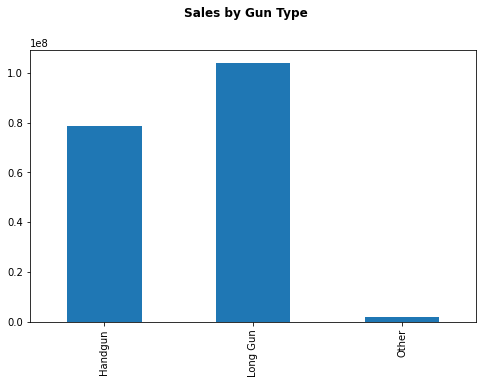

In [38]:
#We sum by guntype by summing all the columns related to each guntype
totals = FBI_clean.totals.groupby('state').sum()
totals_max = totals[totals == totals.max()]
totals_value = totals_max[0]
totals_state = totals_max.index[0]
print(f'The top state that buys guns is {totals_state} with a total of {int(totals_value)}')

handgun = FBI_clean.filter(regex=('handgun'), axis=1).groupby('state').sum().sum(axis=1)
handgun.name = 'handgun'
handgun_max = handgun[handgun == handgun.max()]
handgun_value = handgun_max[0]
handgun_state = handgun_max.index[0]
print(f'The top state that buys handguns is {handgun_state} with a total of {int(handgun_value)}')

long_gun = FBI_clean.filter(regex=('long_gun'), axis=1).groupby('state').sum().sum(axis=1)
long_gun.name = 'long_gun'
long_gun_max = long_gun[long_gun == long_gun.max()]
long_gun_value = long_gun_max[0]
long_gun_state = long_gun_max.index[0]
print(f'The top state that buys long guns is {long_gun_state} with a total of {int(long_gun_value)}')

other = FBI_clean.filter(regex=('other'), axis=1).groupby('state').sum().sum(axis=1)
other.name = 'other'
other_max = other[other == other.max()]
other_value = other_max[0]
other_state = other_max.index[0]
print(f'The top state that buys other types of guns is {other_state} with a total of {int(other_value)}')

type_totals = pd.concat([handgun,long_gun,other,totals],axis=1).astype('Int64')

# Plot the Totals by guntype
type_totals.sum()[:-1].rename(index=lambda x: x.replace('_',' ').title()).plot.bar(figsize=(8,5));
plt.suptitle('Sales by Gun Type', y=1, size= 12, weight='bold');

### 2. What is the general trend of gun purchases?

,,Totals
year,quarter,
1998,1998Q4,891898
1999,1999Q4,3179149
2000,2000Q4,2718566
2001,2001Q4,3054588
2002,2002Q4,2694573
2003,2003Q4,2687841
2004,2004Q4,2806931
2005,2005Q4,2931039
2006,2006Q4,3265474


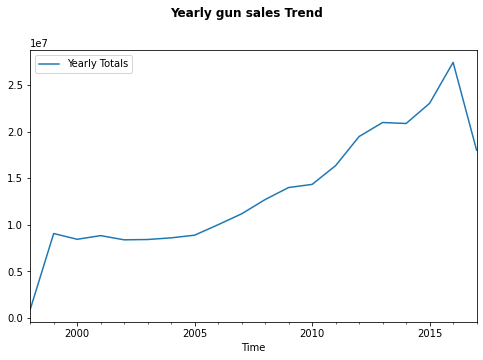

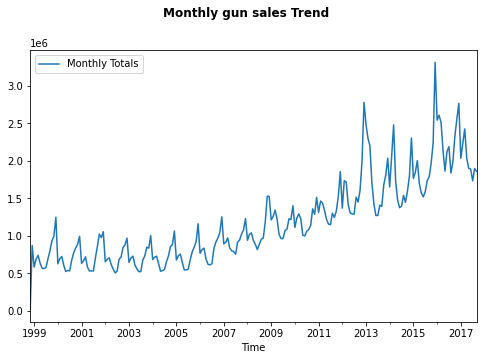

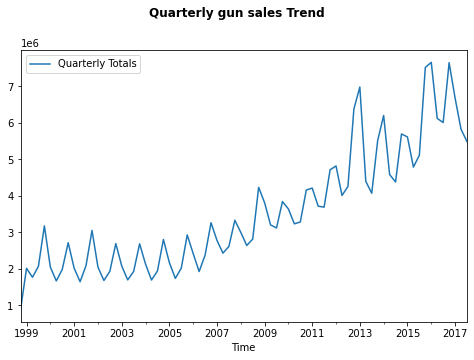

In [39]:
#Get the general Yearly trend
year_total = FBI_clean.groupby('year').sum().reset_index()
# plot of the general yearly trend of gun purchases
year_total.plot.line(x='year', y='totals', figsize=(8,5));
plt.xlabel('Time')
plt.legend(labels=['Yearly Totals'])
plt.suptitle('Yearly gun sales Trend', y=1, size= 12, weight='bold');

#Get the Monthly trend
month_total = FBI_clean.groupby('month').sum().reset_index()
# plot of the general monthly trend of gun purchases
month_total.plot.line(x='month', y='totals', figsize=(8,5));
plt.xlabel('Time')
plt.legend(labels=['Monthly Totals'])
plt.suptitle('Monthly gun sales Trend', y=1, size= 12, weight='bold');

#Get the Quarterly trend
quarter_total = FBI_clean.groupby('quarter').sum().reset_index()
# plot of the general quarterly trend of gun purchases
quarter_total.plot.line(x='quarter', y='totals', figsize=(8,5));
plt.xlabel('Time')
plt.legend(labels=['Quarterly Totals'])
plt.suptitle('Quarterly gun sales Trend', y=1, size= 12, weight='bold');

# Check seasonality by getting the max value of total guns per year 
quarter_FBI = FBI_clean.groupby(['year', 'quarter']).sum()[['totals']]
quarter_max = quarter_FBI.max(axis=0,level=0)
quarter_FBI.query('totals in @quarter_max.totals').rename(columns=lambda x: x.title())

The graphs and tables above show the trend of gun purchases over time.  
- The general (yearly trend) is increasing over time which makes as look into a further question next which is what are the factors that contribute to that increase.
- By further increasing the data frequency of the plot to monthly, we can see there is some kind of pattern withnin each year that can indicate some seasonality in the data and this is better shown by the next graph which plots quarterly data.
- By checking the values of quarterly sales we can see that in most years the top quarter is the 4th quarter which may need to be further checked for the factors leading to that seasonality in purchases.


### 3. Which state has the highest average growth rate in gun purchases (CAGR) (Compound average growth rate)?

The top growing state in gun purchases is Guam with a growth rate of 28.57%

State
Guam             28.57%
Kentucky         26.33%
Massachusetts    26.31%
Georgia          25.84%
Minnesota        20.79%


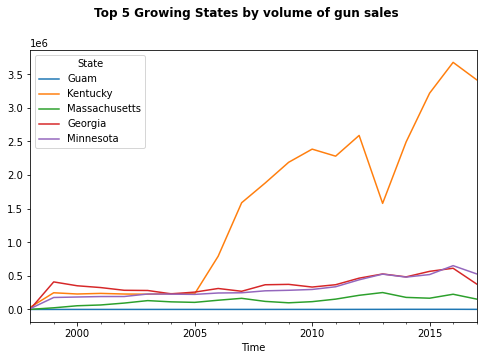

In [40]:
#First summarize the data by year as index and state as columns 
#to easily calculate growth rates for each state and plot the values
#for the top states

year_pivot = FBI_clean.reset_index().pivot_table(index='year',columns='state', values='totals', aggfunc=np.sum)
first = year_pivot.iloc[0]
last = year_pivot.iloc[-1]

year_pivot.columns.name = 'State'

#Calculate the CAGR
length = year_pivot.apply(lambda x: len(x))
CAGR = (last/first)**(1/length)-1

# find the top growing state in gun purchases
max_CAGR = CAGR[CAGR != np.inf].max()

# Report the top growing state
top_state = CAGR[CAGR == max_CAGR].index[0]
print(f'The top growing state in gun purchases is {top_state} with a growth rate of {"{:.2%}".format(max_CAGR)}\n')

#table with the top five growth rates

top_CAGR = CAGR[CAGR != np.inf].sort_values(ascending=False)[:5]
top_CAGR = top_CAGR.apply(lambda x: "{:.2%}".format(x))
print(top_CAGR.to_string())

#plot data for the top five growing states
CAGR_list = top_CAGR.index.to_list()
year_pivot[CAGR_list].plot.line(figsize=(8,5));
plt.xlabel('Time');
plt.suptitle('Top 5 Growing States by volume of gun sales', y=1, size= 12, weight='bold');

- By looking by the total gun purchases per year for each state we can calculate the average yearly growth rate for each state to reach an answer to our question, and after doing the calculations we find the state with the highest growth is Guam.  
- By further investigations and looking at the top 5 growing states, from the plot we see that the volume of sales in Guam is very low and that's why it appears to be growing greatly.
- The second growing state is Kentucky and when looking at the plot it's fairly obvious that Kentucky shows a greater growth in volume of sales.

### 4. Which census data factors affect the gun purchases?

In [41]:
# In this section we transform the totals of gun sales by state by summing the sales over each year 
# and then averaging the yearly sales per state to allow better comparison with census data

#collapse time factor by summing yearly total
FBI_yearly = FBI_clean.reset_index().pivot_table(index=['state','year'], values='totals', aggfunc=np.sum)
#collapse time factor by averaging yearly total by state
FBI_average = FBI_yearly.mean(axis=0, level=0)

#merge the gun data with census data using 'how=inner' to only get the intersection of states in both datasets
merged = pd.merge(FBI_average, census_clean, how='inner', left_index=True, right_index=True)

After assessing the gun sales and inspecting and visualizing the trends and volumes, We try to inspect which factors can affect the gun sales.  
Here we combine the gun data with census data to have a look at the bigger pircture.  
First we start by collapsing the time factor of the gun data to allow us to combine it with the available census data.
The proposed method is as follows:
- First we collapse the time factor by summation and obtaining a yearly total for each state
- Then we average the yearly observations per state to get one point per state  

This allows us to easily merge the two datasets available with the states as index and taking only data for the states in both datasets

In [42]:
#compute a correlation table for all factors with totals
corr = merged.corr().iloc[:,:1]

#take a quick look at the correlation matrix
corr

,totals
totals,1.000000
pop_e_2016,0.649697
pop_e_2010,0.649583
pop_change,0.036332
pop_c_2010,0.649580
...,...
veteran_firms,0.650293
nonveteran_firms,0.611154
pop_per_square,-0.073982
land,0.087509


As a first step to see which factors may affect the gun sales we compute the correlations between census data and gun totals.  

When computing the correlation matrix, In our study we are only interested in correlations with the numbers of total guns so we only use the first column of the matrix which correlates all the factors with the gun totals

In [43]:
#find factors with correlation coefficient higher than 0.6 (high correlation coefficient)
high_coefficients = corr[corr['totals'].abs() >= 0.6]

high_coefficients

,totals
totals,1.000000
pop_e_2016,0.649697
pop_e_2010,0.649583
pop_c_2010,0.649580
veterans,0.673238
housing_2016,0.657252
housing_2010,0.655460
households,0.657333
health,0.609985
manufacturers,0.684760


To further narrow down our selection we only look at factors having high correlation coeeficients (coefficients higher than 0.6) and select unique factors that may add different perspectives to our analysis.  

In [44]:
high_corr_list = ['pop_e_2016', 'households', 'employment', 'firms']

We chose the above four factors as being sufficient for the scope of our current analysis and being unique in the information they add.  
Then we create a scatter plot matrix for the four factors to visually show their high correlation with gun data.

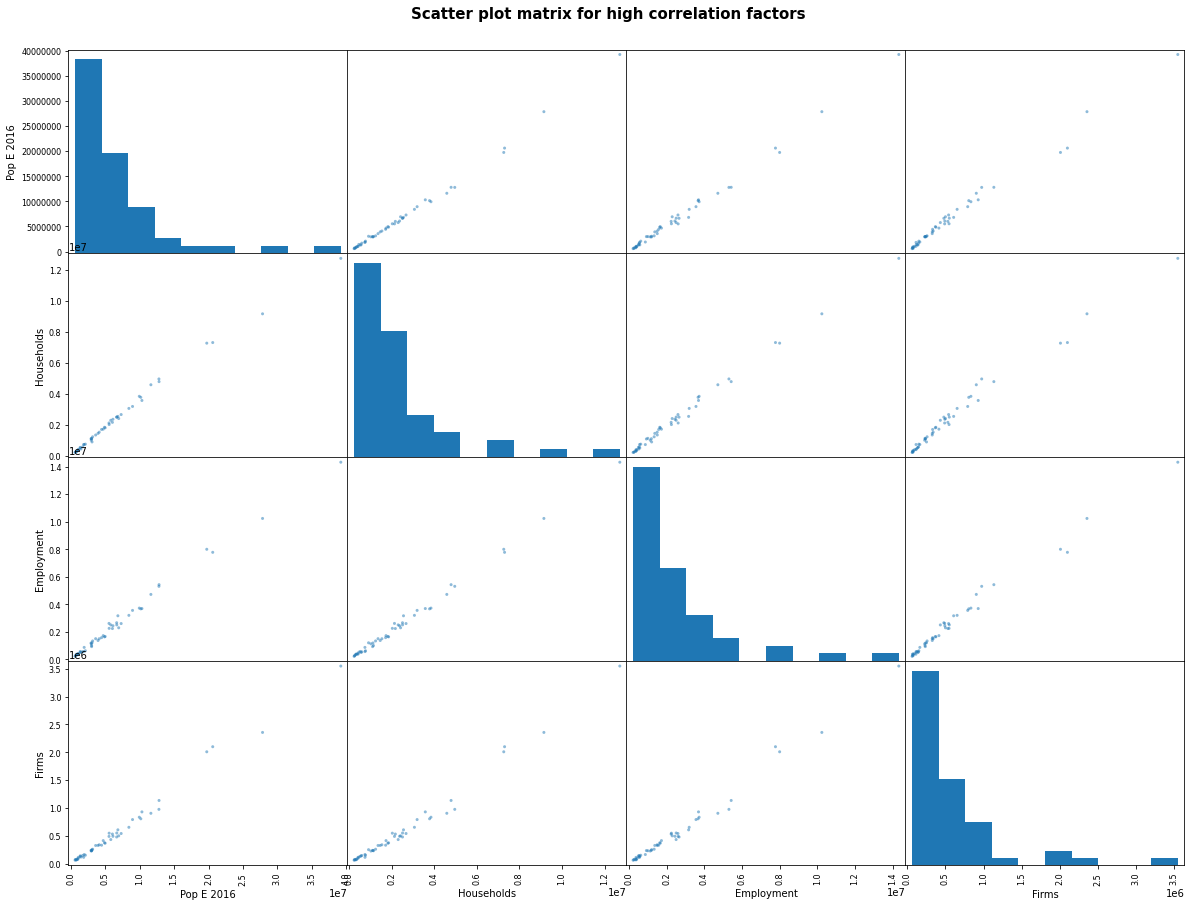

In [45]:
#create a scatter plot for the selected factors to show a visual representation of their correlation
pd.plotting.scatter_matrix(merged.astype('float')[high_corr_list].rename(columns=lambda x: x.replace('_',' ').title()), figsize=(20,15));
plt.suptitle('Scatter plot matrix for high correlation factors', y=0.92, size= 15, weight='bold');

<a id='conclusions'></a>
## Conclusions

At the end of this report we summarize the results as follows:
<ol>
    <li> The most prefered weapon types are the long guns
    <li> The gun sales show an increasing trend over time with possible seasonality as viewed by the quarterly data graph
    <li> Kentucky appeares to be the most significantly growing market for Guns as viewed by the sales volume of guns in the state and showed by the high average growth rate over the years
    <li> We end the report by a number of factors that can possibly describe the trend of gun sales being: 
    <ul>
        <li> Population size
        <li> The number of households 
        <li> The employment rate
        <li> The number of firms

The shortcomings of this report:
- The last point needs further investigations using better statistical inference tests and analysis that are out of scope for this project
- The data represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold.